<h1>CIFAR10 Image Classification Menggunakan 3 Model Deep Learning yang Berbeda</h1>
Author : Rolyando Lio Suhendro (Universitas Mercu Buana)

CIFAR10 adalah dataset yang berisi 60.000 sample 32x32 gambar berwarna yang diklasifikasikan menjadi 10 kelas berbeda.
Disini akan dilatih tiga model deep learning berbeda menggunakan dataset tersebut dengan harapan model dapat mengklasifikasikan gambar dengan tepat. Tiga model deep learning tersebut beserta hasil trainingnya adalah:

<ul>
  <li>Simple Full Connected Neural Network</li>
  <li>Simple Convolutional Neural Network (72% Akurasi)</li>
  <li>Residual Network (92% Akurasi)</li>
</ul>





In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()
print('Training set shape',X_train.shape)
print('Test Set shape',X_train.shape)

170508288/170498071 [==============================] - 3s 0us/step
Training set shape (50000, 32, 32, 3)
Test Set shape (50000, 32, 32, 3)


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
def normalize_data(x):
  return x / 255.

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
X_train[0,:,:,:]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
yoh_train = tf.one_hot(y_train,10).numpy().reshape(50000,10)
print(y_train[6123])
yoh_train[6123]

[8]


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
yoh_test = tf.one_hot(y_test,10).numpy().reshape(10000,10)
print(y_test[6123])
yoh_test[6123]

[6]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
simple_network = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
simple_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
simple_network.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_simple = simple_network.fit(x=X_train,y=yoh_train,validation_data=[X_test,yoh_test],epochs=30)

Epoch 1/30
1563/1563 [==============================] - 8s 3ms/step - loss: 1.9217 - accuracy: 0.3192 - val_loss: 1.8229 - val_accuracy: 0.3593
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8227 - accuracy: 0.3590 - val_loss: 1.8004 - val_accuracy: 0.3727
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7901 - accuracy: 0.3756 - val_loss: 1.7776 - val_accuracy: 0.3816
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7739 - accuracy: 0.3845 - val_loss: 1.7856 - val_accuracy: 0.3745
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7644 - accuracy: 0.3870 - val_loss: 1.7912 - val_accuracy: 0.3706
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7553 - accuracy: 0.3912 - val_loss: 1.7712 - val_accuracy: 0.3841
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7457 - accuracy: 0.3957 - val_loss: 1.7530 - val_accuracy:

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 re_lu_2 (ReLU)              (None, 16, 16, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)        

In [ ]:
cnn_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_cnn = cnn_model.fit(X_train,yoh_train,epochs=10,validation_data=[X_test,yoh_test])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7578 - accuracy: 0.3534 - val_loss: 1.6031 - val_accuracy: 0.4134
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3483 - accuracy: 0.5037 - val_loss: 1.3337 - val_accuracy: 0.5140
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1500 - accuracy: 0.5800 - val_loss: 1.2958 - val_accuracy: 0.5406
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0474 - accuracy: 0.6191 - val_loss: 1.1494 - val_accuracy: 0.5933
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9764 - accuracy: 0.6461 - val_loss: 1.0631 - val_accuracy: 0.6216
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9212 - accuracy: 0.6667 - val_loss: 1.0522 - val_accuracy: 0.6240
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8729 - accuracy: 0.6842 - val_loss: 1.1087 - val_accuracy

In [ ]:
def resnet():
  input = tf.keras.layers.Input(shape=(32,32,3,))
  X = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(input)
  X = tf.keras.layers.BatchNormalization()(X)
  X1 = tf.keras.layers.MaxPool2D()(X)
  X2 = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(X1)
  X2 = tf.keras.layers.ReLU()(X2)
  X2 = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same')(X2)
  X3 = X2 + X1
  X3 = tf.keras.layers.ReLU()(X3)
  X3 = tf.keras.layers.Conv2D(filters=64,kernel_size=(1,1),padding='same')(X3)
  X3 = tf.keras.layers.BatchNormalization()(X3)
  X3 = tf.keras.layers.MaxPool2D()(X3)
  X4 = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(X3)
  X4 = tf.keras.layers.ReLU()(X4)
  X4 = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same')(X4)
  X5 = X4 + X3
  X5 = tf.keras.layers.ReLU()(X5)
  X5 = tf.keras.layers.BatchNormalization()(X5)
  X5 = tf.keras.layers.Conv2D(filters=16,kernel_size=(1,1),padding='same')(X5)
  X5 = tf.keras.layers.MaxPool2D()(X5)
  X5 = tf.keras.layers.Flatten()(X5)
  X5 = tf.keras.layers.Dense(5,activation='relu')(X5)
  X5 = tf.keras.layers.Dense(10,activation='softmax')(X5)
  return tf.keras.Model(inputs=input,outputs=X5)


In [ ]:
resnet_model = resnet()
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 128)  3584        ['input_4[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 32, 32, 128)  512        ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 16, 16, 128)  0          ['batch_normalization_2[0][0]

In [ ]:
resnet_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
history_resnet = resnet_model.fit(X_train,yoh_train,epochs=20,validation_data=[X_test,yoh_test])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6964 - accuracy: 0.3623 - val_loss: 1.6606 - val_accuracy: 0.3684
Epoch 2/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3113 - accuracy: 0.5247 - val_loss: 1.2708 - val_accuracy: 0.5530
Epoch 3/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0952 - accuracy: 0.6088 - val_loss: 1.1486 - val_accuracy: 0.5907
Epoch 4/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9548 - accuracy: 0.6595 - val_loss: 1.4647 - val_accuracy: 0.5354
Epoch 5/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8562 - accuracy: 0.6942 - val_loss: 1.0920 - val_accuracy: 0.6159
Epoch 6/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7725 - accuracy: 0.7213 - val_loss: 1.0582 - val_accuracy: 0.6311
Epoch 7/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7079 - accuracy: 0.7452 - val_loss: 0.9632 -

In [ ]:
cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
cnn_model2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model2.fit(X_train,yoh_train,validation_data=[X_test,yoh_test],epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.9082 - accuracy: 0.2814 - val_loss: 1.7602 - val_accuracy: 0.3246
Epoch 2/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6028 - accuracy: 0.4082 - val_loss: 1.5754 - val_accuracy: 0.4555
Epoch 3/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3758 - accuracy: 0.5158 - val_loss: 1.3390 - val_accuracy: 0.5291
Epoch 4/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2409 - accuracy: 0.5658 - val_loss: 1.3208 - val_accuracy: 0.5270
Epoch 5/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1223 - accuracy: 0.6016 - val_loss: 1.2017 - val_accuracy: 0.5695
Epoch 6/20
1563/1563 [==============================] - 38s 25ms/step - loss: 1.0395 - accuracy: 0.6297 - val_loss: 1.2585 - val_accuracy: 0.5493
Epoch 7/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9733 - accuracy: 0.6518 - val_loss: 1.1338 -

In [ ]:
import os
def tensorflow_shutup():
    """
    Make Tensorflow less verbose
    """
    try:
        os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

        # noinspection PyPackageRequirements
        import tensorflow as tf
        from tensorflow.python.util import deprecation

        tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

        # Monkey patching deprecation utils to shut it up! Maybe good idea to disable this once after upgrade
        # noinspection PyUnusedLocal
        def deprecated(date, instructions, warn_once=True):  # pylint: disable=unused-argument
            def deprecated_wrapper(func):
                return func
            return deprecated_wrapper

        deprecation.deprecated = deprecated

    except ImportError:
        pass

tensorflow_shutup()

In [ ]:
tf.data.experimental.enable_debug_mode()

In [ ]:
from PIL import Image

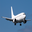

In [ ]:
img = Image.open("pesawat.jpg").convert('RGB').resize((32, 32), Image.ANTIALIAS)
img

In [ ]:
uji = np.array(img).reshape(1,32,32,-1)
uji.shape

(1, 32, 32, 3)

In [ ]:
uji = uji/255.
uji

In [ ]:
result_list = ['pesawat','automobile','burung','kucing','rusa','anjing','katak','kuda','kapal','truk']
result_list[2]

'burung'

In [ ]:
def prediksi(model,sampel):
  return result_list[np.argmax(model.predict(sampel))]

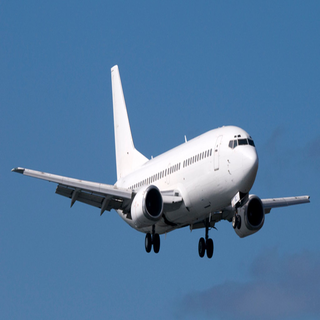

In [ ]:
ori_img = Image.open("pesawat.jpg").resize((320, 320), Image.ANTIALIAS)
ori_img

In [ ]:
print("Berdasarkan Model Deep Learning Biasa, Gambar di atas adalah ",prediksi(simple_network,uji))

Berdasarkan Model Deep Learning Biasa, Gambar di atas adalah  kapal


In [ ]:
print("Berdasarkan Model Deep Learning CNN Biasa, Gambar di atas adalah",prediksi(cnn_model2,uji))

Berdasarkan Model Deep Learning CNN Biasa, Gambar di atas adalah pesawat


In [ ]:
print('Berdasarkan Model Deep learning "Residual Network", Gambar diatas adalah ',prediksi(resnet_model,uji))

Berdasarkan Model Deep learning "Residual Network", Gambar diatas adalah  pesawat


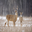

In [ ]:
rusa = Image.open("deer.jpg").convert('RGB').resize((32, 32), Image.ANTIALIAS)
rusa

In [ ]:
uji_rusa = np.array(rusa).reshape(1,32,32,-1)
uji_rusa = uji_rusa/255.
uji_rusa.shape

(1, 32, 32, 3)

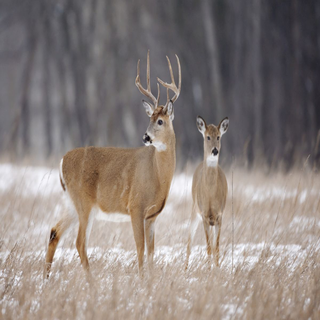

In [ ]:
ori_rusa = Image.open("deer.jpg").resize((320, 320), Image.ANTIALIAS)
ori_rusa

In [ ]:
print("Berdasarkan Model Deep Learning Biasa, Gambar di atas adalah ",prediksi(simple_network,uji_rusa))

Berdasarkan Model Deep Learning Biasa, Gambar di atas adalah  kucing


In [ ]:
print("Berdasarkan Model Deep Learning CNN Biasa, Gambar di atas adalah",prediksi(cnn_model2,uji_rusa))

Berdasarkan Model Deep Learning CNN Biasa, Gambar di atas adalah rusa


In [ ]:
print('Berdasarkan Model Deep learning "Residual Network", Gambar diatas adalah ',prediksi(resnet_model,uji_rusa))

Berdasarkan Model Deep learning "Residual Network", Gambar diatas adalah  rusa


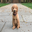

In [ ]:
dog = Image.open("dog.jpg").convert('RGB').resize((32, 32), Image.ANTIALIAS)
dog

In [ ]:
uji_dog = np.array(dog).reshape(1,32,32,-1)
uji_dog = uji_dog/255.
uji_dog.shape

(1, 32, 32, 3)

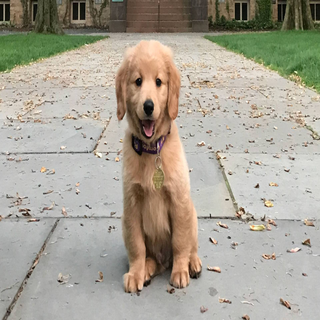

In [ ]:
Image.open("dog.jpg").resize((320, 320), Image.ANTIALIAS)

In [ ]:
print("Berdasarkan Model Deep Learning Biasa, Gambar di atas adalah ",prediksi(simple_network,uji_dog))

Berdasarkan Model Deep Learning Biasa, Gambar di atas adalah  kucing


In [ ]:
print("Berdasarkan Model Deep Learning CNN Biasa, Gambar di atas adalah",prediksi(cnn_model2,uji_dog))

Berdasarkan Model Deep Learning CNN Biasa, Gambar di atas adalah rusa


In [ ]:
print('Berdasarkan Model Deep learning "Residual Network", Gambar diatas adalah ',prediksi(resnet_model,uji_dog))

Berdasarkan Model Deep learning "Residual Network", Gambar diatas adalah  anjing
